# Data Collection and Visualization


Data Sources:

Climate/Weather Data:

 https://www.usclimatedata.com/climate/arlington/virginia/united-states/usva1080

Accident Data:

https://www.virginiaroads.org/datasets/VDOT::crash-data-1/explore

- basic: https://www.virginiaroads.org/maps/VDOT::crashdata-basic-1
    - dictionary: https://services.arcgis.com/p5v98VHDX9Atv3l7/ArcGIS/rest/services/CrashData_test/FeatureServer/0
- details: https://www.virginiaroads.org/maps/VDOT::crashdata-details-2
    - dictionary: https://services.arcgis.com/p5v98VHDX9Atv3l7/ArcGIS/rest/services/CrashData_test/FeatureServer/1

In [ ]:
import requests
import pandas as pd

In [ ]:
df_basic = pd.read_csv("crash_data_basic.csv")

In [ ]:
df_basic.shape

(1128862, 69)

In [ ]:
df_details = pd.read_csv("crash_data_details.csv", low_memory=False)

In [ ]:
df_details.shape

(1128862, 63)

In [ ]:
def load_crash_data():
    """Loads and merges crash data from 'basic' and 'details' CSV files.

    Returns:
        pandas.DataFrame: Merged crash data with redundant columns removed.
    """

    df_basic = pd.read_csv("crash_data_basic.csv", low_memory=False)
    df_basic.columns = df_basic.columns.str.replace(' ', '_')
    df_details = pd.read_csv("crash_data_details.csv", low_memory=False)

    common_columns = df_basic.columns.intersection(df_details.columns).difference(['Document_Nbr'])
    # Drop the common columns (except 'Document_Nbr') from df_basic
    df_basic = df_basic.drop(columns=common_columns)

    df = pd.merge(df_basic, df_details, on="Document_Nbr", how='inner')
    return df

In [ ]:
crash_data = load_crash_data()

In [ ]:
pd.set_option("display.max_columns", None)
crash_data.head()

,Document_Nbr,Crash_Date,Crash_Military_Time,K_People,A_People,B_People,C_People,Persons_Injured,Pedestrians_Killed,Pedestrians_Injured,Vehicle_Count,Collision_Type,Weather_Condition,Light_Condition,Roadway_Surface_Condition,Relation_To_Roadway,Roadway_Alignment,Roadway_Surface_Type,Roadway_Defect,Roadway_Description,Intersection_Type,Traffic_Control_Type,Traffic_Control_Status,Work_Zone_Related,Work_Zone_Location,Work_Zone_Type,School_Zone,First_Harmful_Event,First_Harmful_Event_Loc,Alcohol?,Animal_Related?,Unrestrained?,Bike?,Distracted?,Drowsy?,Drug_Related?,Guardrail_Related?,Hitrun?,Lgtruck?,Motorcycle?,Pedestrian?,Speed?,Max_Speed_Diff,RoadDeparture_Type,Intersection_Analysis,Senior?,Young?,Mainline?,Night?,VDOT_District,Juris_Code,Physical_Juris_Name,Functional_Class,Facility_Type,Area_Type,SYSTEM,VSP,Ownership,Planning_District,MPO_Name,RTE_Name,RNS_MP,Node,Node_Offset_(ft),x,y,OBJECTID,Crash_Year,Crash_Severity,Driver_VehicleNumber,Driver_InjuryType,Driver_Age,Driver_Gender,Driver_Action_Type_Cd,Driver_Airbag_Deployment,Driver_Alcohol_Test_Type_Cd,Driver_Condition_Type_Cd,Driver_Distraction_Type_Cd,Driver_Drinking_Type_Cd,Driver_Drug_Use_Cd,Driver_Ejected_From_Vehicle,Driver_Ems_Transport_Ind,Driver_Fled_Scene_Ind,Driver_Safety_Equip_Used,Driver_Vis_Obscured_Type_Cd,Summons_Issued_Cd,Vehiclenumber,Vehicle_Body_Type_Cd,Vehicle_Make_Nm,Vehicle_Maneuver_Type_Cd,Vehicle_Model_Nm,Vehicle_Year_Nbr,Comm_Cargo_Body_Type_Cd,Comm_Vehicle_Body_Type_Cd,Speed_Before,Speed_Posted,Speed_Max_Safe,First_Crash_Event_Cd,Second_Crash_Event_Cd,Third_Crash_Event_Cd,Fourth_Crash_Event_Cd,Most_Harmful_Crash_Event_Cd,Initial_Veh_Impact_Area_Cd,Direction_Of_Travel_Cd,Pass_vehiclenumber,Pass_InjuryType,Pass_age,Pass_gender,Pass_Safety_Equip_Used,Pass_Airbag_Deployment,Pass_Ejected_From_Vehicle,Pass_Ems_Transport_Ind,Bike_VehicleNumber,Bike_InjuryType,Bike_Age,Bike_Gender,Ped_Number,Ped_InjuryType,PED_Age,Ped_Gender,Ped_Action,Ped_Drink,Ped_Cond,Ped_Al_Test,Ped_Drug,Ped_Rflct,Local Case CD,Route or Street Name
0,163465085,12/6/2016 5:00:00 AM,700,0,0,0,0,0,0,0,2,1. Rear End,1. No Adverse Condition (Clear/Cloudy),4. Darkness - Road Lighted,1. Dry,8. Non-Intersection,1. Straight - Level,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"3. Two-Way, Divided, Positive Median Barrier",1. Not at Intersection,17. Highway Safety Corridor,1. Yes - Working,2. No,NaN,NaN,3. No,20. Motor Vehicle In Transport,1. On Roadway,No,No,Belted,No,No,No,No,No,No,Yes,No,No,Yes,5.0,NOT_RD,Not Intersection,No,No,Yes,Yes,9. Northern Virginia,76,076. Prince William County,"1-Interstate (A,1)",4-Two-Way Divided,Urban,VDOT Interstate,7,1. State Hwy Agency,Northern Virginia,NOVA,R-VA IS00095NB,158.85,NaN,NaN,-77.280787,38.653845,74831,2016,O,1;2,PDO;PDO,52;26,Male;Female,12. Following Too Close;1. No Improper Action,2. Not Deployed;2. Not Deployed,n/a; n/a,1. No Defects;1. No Defects,14. No Distraction;14. No Distraction,1. No Drinking;1. No Drinking,2. No;2. No,1. Not Ejected;1. Not Ejected,No;No,No;No,3. Lap and Shoulder Belt;3. Lap and Shoulder Belt,1. Not Obscured;1. Not Obscured,1. Yes;2. No,1;2,23. Truck (3 Axles or More);1. Passenger car,KENTWORTH;HONDA,1. Going Straight Ahead;5. Slowing or Stopping,TRACTOR;CIVIC,2016;2009,n/a; n/a,n/a; n/a,10;5,60;60,5;5,20. Motor Vehicle In Transport;20. Motor Vehic...,n/a; n/a,n/a; n/a,n/a; n/a,20. Motor Vehicle In Transport;20. Motor Vehic...,12;6,North;North,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIV716171269,I-95
1,160725125,1/26/2016 5:00:00 AM,1636,0,0,0,0,0,0,0,2,2. Angle,1. No Adverse Condition (Clear/Cloudy),2. Daylight,1. Dry,1. Main-Line Roadway,1. Straight - Level,1. Concrete,1. No Defects,"1. Two-Way, Not Divided",1. Not at Intersection,6. Traffic Lanes Marked,1. Yes - Working,2. No,NaN,NaN,3. No,20. Motor Vehicle In Transport,1. On Roadway,No,No,Belted,No,No,No,No,No,No,No,No,No,No,NaN,NOT_RD,Not Intersection,No,Yes,Yes,No,5. Hampton Roads,114,114. City of Hampton,"4-Mino

In [ ]:
crash_data.shape

(1128862, 128)

In [ ]:
crash_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128862 entries, 0 to 1128861
Data columns (total 128 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    Document_Nbr                 int64  
 1    Crash_Date                   object 
 2    Crash_Military_Time          int64  
 3    K_People                     int64  
 4    A_People                     int64  
 5    B_People                     int64  
 6    C_People                     int64  
 7    Persons_Injured              int64  
 8    Pedestrians_Killed           int64  
 9    Pedestrians_Injured          int64  
 10   Vehicle_Count                int64  
 11   Collision_Type               object 
 12   Weather_Condition            object 
 13   Light_Condition              object 
 14   Roadway_Surface_Condition    object 
 15   Relation_To_Roadway          object 
 16   Roadway_Alignment            object 
 17   Roadway_Surface_Type         object 
 18   Roadway_Defect      

In [ ]:
crash_data.describe()

,Document_Nbr,Crash_Military_Time,K_People,A_People,B_People,C_People,Persons_Injured,Pedestrians_Killed,Pedestrians_Injured,Vehicle_Count,Max_Speed_Diff,Juris_Code,VSP,RNS_MP,Node,Node_Offset_(ft),x,y,OBJECTID,Crash_Year
count,1.128862e+06,1.128862e+06,1.128862e+06,1.128862e+06,1.128862e+06,1.128862e+06,1.128862e+06,1.128862e+06,1.128862e+06,1.128862e+06,223787.000000,1.128862e+06,1.128862e+06,1.124577e+06,6.249970e+05,624997.000000,1.128811e+06,1.128811e+06,1.128862e+06,1.128862e+06
mean,2.022303e+08,1.348328e+03,7.043376e-03,5.914983e-02,2.722653e-01,1.713779e-01,5.027931e-01,1.028469e-03,1.217155e-02,1.835440e+00,13.728318,8.108815e+01,4.139171e+00,5.344377e+01,6.042272e+05,133.307064,-7.782470e+01,3.775233e+01,5.644315e+05,2.020020e+03
std,2.649358e+07,5.563386e+02,8.944326e-02,2.889645e-01,6.245874e-01,5.223040e-01,8.876708e-01,3.246518e-02,1.155670e-01,6.800332e-01,10.913876,5.493038e+01,2.230156e+00,8.806960e+01,3.399528e+05,131.354587,1.406076e+00,7.973925e-01,3.258745e+05,2.649028e+00
min,1.600150e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000,0.000000e+00,1.000000e+00,-7.000000e-02,5.005300e+04,0.000000,-8.365540e+01,3.653920e+01,1.000000e+00,2.016000e+03
25%,1.808451e+08,9.300000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.000000,3.000000e+01,2.000000e+00,1.050000e+00,3.130550e+05,32.740000,-7.838279e+01,3.704826e+01,2.822162e+05,2.018000e+03
50%,2.019152e+08,1.430000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,10.000000,7.700000e+01,5.000000e+00,7.210000e+00,5.477950e+05,84.850000,-7.745412e+01,3.754145e+01,5.644315e+05,2.020000e+03
75%,2.232852e+08,1.745000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,20.000000,1.220000e+02,6.000000e+00,6.831000e+01,7.525880e+05,198.050000,-7.710431e+01,3.862259e+01,8.466468e+05,2.022000e+03
max,2.507252e+08,2.359000e+03,6.000000e+00,5.400000e+01,3.600000e+01,3.800000e+01,5.400000e+01,3.000000e+00,7.000000e+00,7.500000e+01,175.000000,3.390000e+02,7.000000e+00,5.097200e+02,1.289877e+06,500.000000,-7.534422e+01,3.944027e+01,1.128862e+06,2.025000e+03


In [ ]:
# save as csv for future use
crash_data.to_csv('crash_data.csv', index=False)

# EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Basic Data Exploration
print("Shape of the data:", crash_data.shape)
print("\nData types:\n", crash_data.dtypes)
print("\nDescriptive statistics:\n", crash_data.describe())

Shape of the data: (1128862, 128)

Data types:
 Document_Nbr                     int64
Crash_Date                      object
Crash_Military_Time              int64
K_People                         int64
A_People                         int64
B_People                         int64
C_People                         int64
Persons_Injured                  int64
Pedestrians_Killed               int64
Pedestrians_Injured              int64
Vehicle_Count                    int64
Collision_Type                  object
Weather_Condition               object
Light_Condition                 object
Roadway_Surface_Condition       object
Relation_To_Roadway             object
Roadway_Alignment               object
Roadway_Surface_Type            object
Roadway_Defect                  object
Roadway_Description             object
Intersection_Type               object
Traffic_Control_Type            object
Traffic_Control_Status          object
Work_Zone_Related               object
Work_Zone_Locati

In [ ]:
# Exploring Categorical Features
categorical_features = ['Collision_Type', 'Weather_Condition', 'Light_Condition',
                       'Roadway_Surface_Condition', 'Relation_To_Roadway',
                       'Roadway_Alignment', 'Roadway_Surface_Type', 'Roadway_Defect',
                       'Roadway_Description', 'Intersection_Type', 'Traffic_Control_Type',
                       'Traffic_Control_Status', 'Work_Zone_Related', 'Work_Zone_Location',
                       'Work_Zone_Type', 'School_Zone', 'First_Harmful_Event',
                       'First_Harmful_Event_Loc', 'Alcohol?', 'Animal_Related?',
                       'Unrestrained?', 'Bike?', 'Distracted?', 'Drowsy?',
                       'Drug_Related?', 'Guardrail_Related?', 'Hitrun?', 'Lgtruck?',
                       'Motorcycle?', 'Pedestrian?', 'Speed?', 'RoadDeparture_Type']

for feature in categorical_features:
    print(f"\nValue counts for {feature}:\n", crash_data[feature].value_counts())
    # Visualize using bar plots (optional)
    # plt.figure(figsize=(10, 6))
    # crash_data[feature].value_counts().plot(kind='bar')
    # plt.title(f'Distribution of {feature}')
    # plt.xlabel(feature)
    # plt.ylabel('Count')
    # plt.show()


Value counts for Collision_Type:
 Collision_Type
1. Rear End                          339646
2. Angle                             291616
9. Fixed Object - Off Road           217287
4. Sideswipe - Same Direction         94039
10. Deer                              56200
16. Other                             34873
3. Head On                            24573
8. Non-Collision                      18436
5. Sideswipe - Opposite Direction     17414
12. Ped                               13221
6. Fixed Object in Road               10071
15. Backed Into                        6708
11. Other Animal                       4459
7. Train                                222
13. Bicyclist                            76
14. Motorcyclist                         20
Not Applicable                            1
Name: count, dtype: int64

Value counts for Weather_Condition:
 Weather_Condition
1. No Adverse Condition (Clear/Cloudy)    941531
5. Rain                                   146337
6. Snow               


Descriptive statistics for Crash_Military_Time:
 count    1.128862e+06
mean     1.348328e+03
std      5.563386e+02
min      0.000000e+00
25%      9.300000e+02
50%      1.430000e+03
75%      1.745000e+03
max      2.359000e+03
Name: Crash_Military_Time, dtype: float64


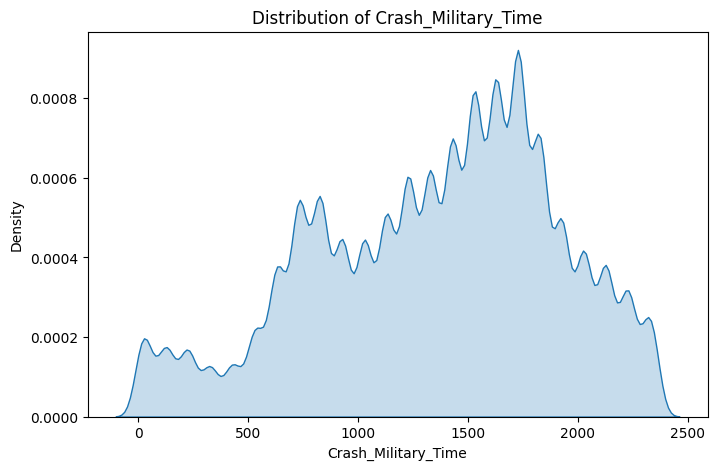


Descriptive statistics for K_People:
 count    1.128862e+06
mean     7.043376e-03
std      8.944326e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.000000e+00
Name: K_People, dtype: float64


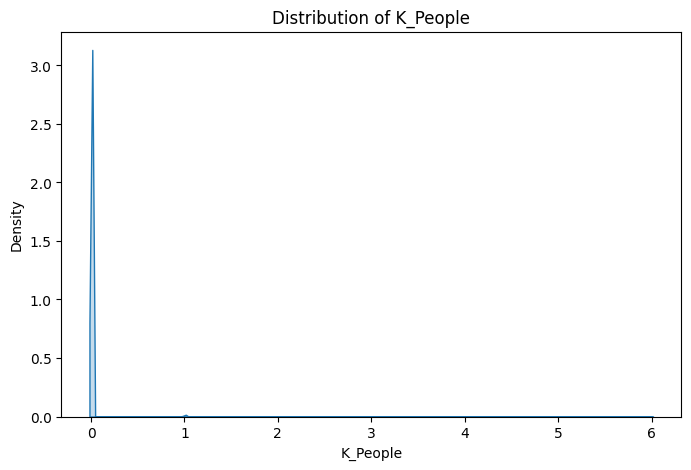


Descriptive statistics for A_People:
 count    1.128862e+06
mean     5.914983e-02
std      2.889645e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.400000e+01
Name: A_People, dtype: float64


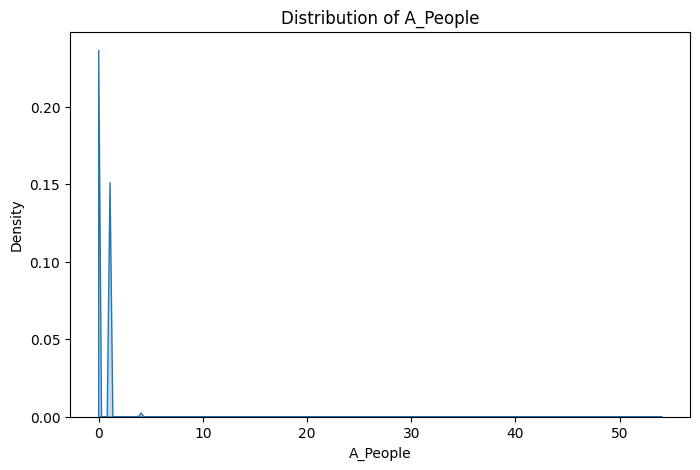


Descriptive statistics for B_People:
 count    1.128862e+06
mean     2.722653e-01
std      6.245874e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.600000e+01
Name: B_People, dtype: float64


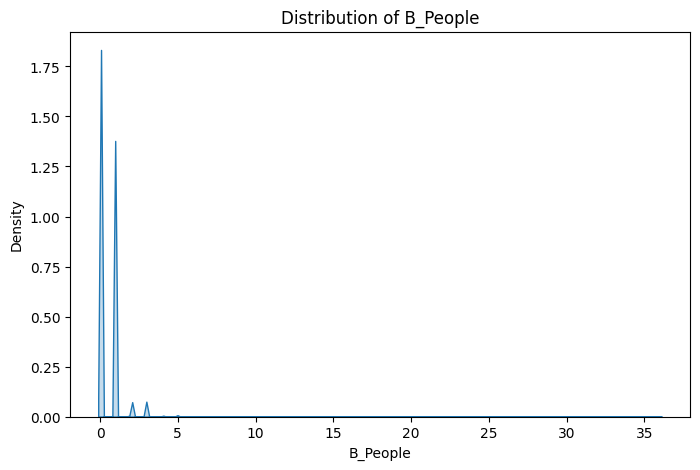


Descriptive statistics for C_People:
 count    1.128862e+06
mean     1.713779e-01
std      5.223040e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+01
Name: C_People, dtype: float64


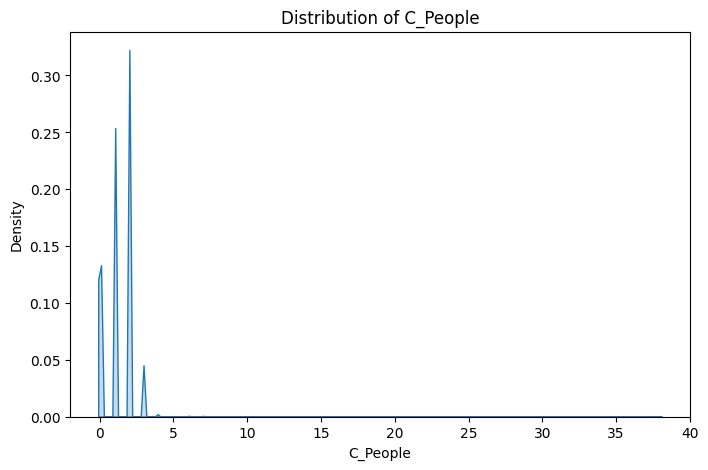


Descriptive statistics for Persons_Injured:
 count    1.128862e+06
mean     5.027931e-01
std      8.876708e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      5.400000e+01
Name: Persons_Injured, dtype: float64


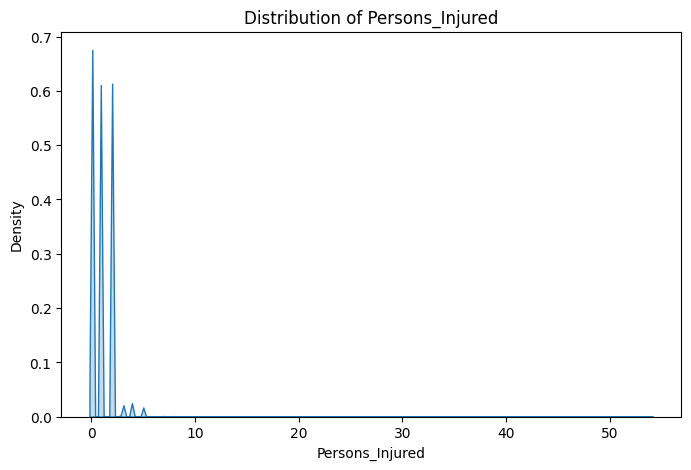


Descriptive statistics for Pedestrians_Killed:
 count    1.128862e+06
mean     1.028469e-03
std      3.246518e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.000000e+00
Name: Pedestrians_Killed, dtype: float64


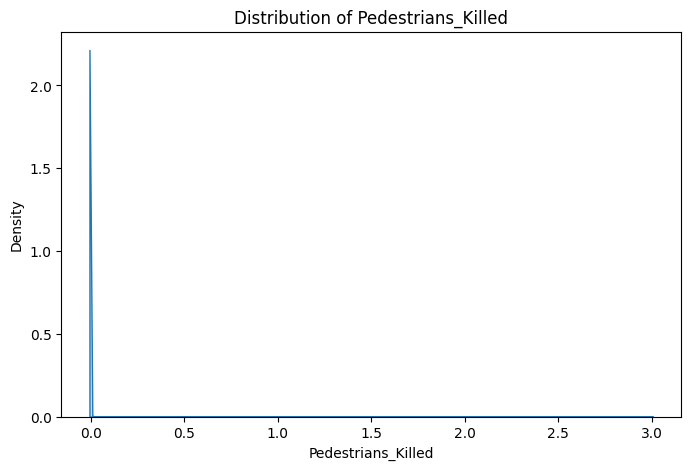


Descriptive statistics for Pedestrians_Injured:
 count    1.128862e+06
mean     1.217155e-02
std      1.155670e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.000000e+00
Name: Pedestrians_Injured, dtype: float64


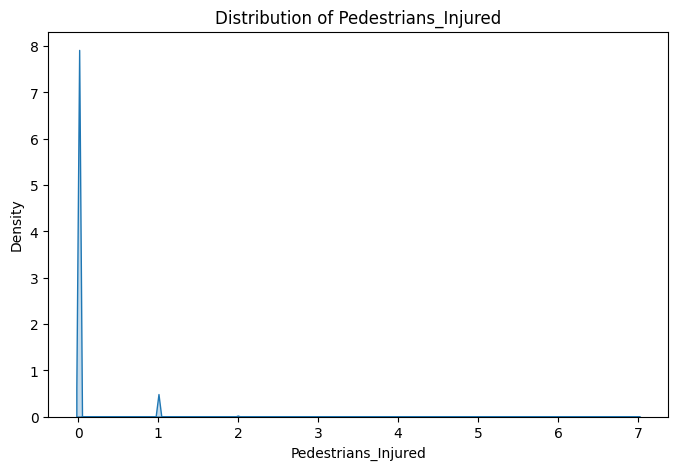


Descriptive statistics for Vehicle_Count:
 count    1.128862e+06
mean     1.835440e+00
std      6.800332e-01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      7.500000e+01
Name: Vehicle_Count, dtype: float64


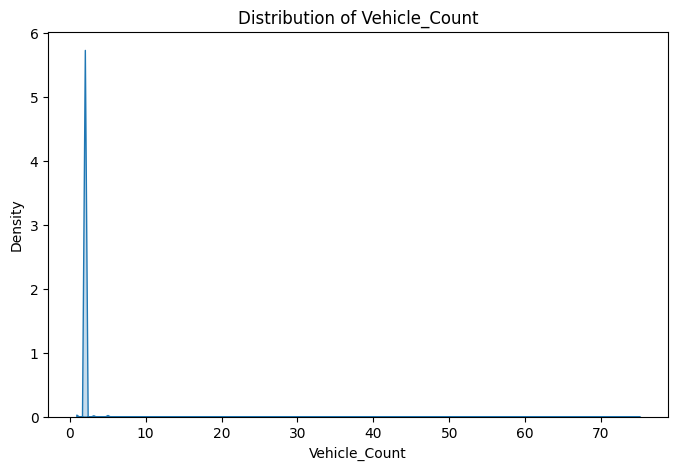


Descriptive statistics for Max_Speed_Diff:
 count    223787.000000
mean         13.728318
std          10.913876
min           1.000000
25%           5.000000
50%          10.000000
75%          20.000000
max         175.000000
Name: Max_Speed_Diff, dtype: float64


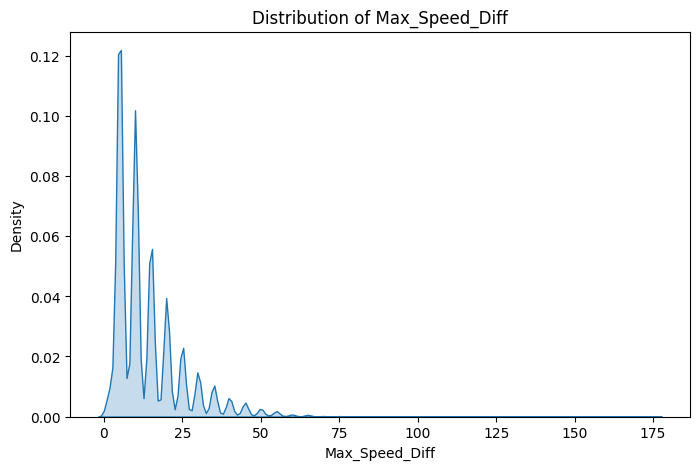

In [ ]:
# Exploring Numerical Features

numerical_features = ['Crash_Military_Time', 'K_People', 'A_People',
                      'B_People', 'C_People', 'Persons_Injured', 'Pedestrians_Killed',
                      'Pedestrians_Injured', 'Vehicle_Count', 'Max_Speed_Diff']

for feature in numerical_features:
    print(f"\nDescriptive statistics for {feature}:\n", crash_data[feature].describe())
    plt.figure(figsize=(8, 5))
    sns.kdeplot(crash_data[feature], fill=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

In [ ]:
# correlation
correlation_matrix = crash_data[numerical_features].corr()
print("\nCorrelation matrix:\n", correlation_matrix)


Correlation matrix:
                      Crash_Military_Time  K_People  A_People  B_People  \
Crash_Military_Time             1.000000 -0.003346  0.006725  0.027193   
K_People                       -0.003346  1.000000  0.077381  0.005046   
A_People                        0.006725  0.077381  1.000000  0.017028   
B_People                        0.027193  0.005046  0.017028  1.000000   
C_People                        0.036231 -0.011048  0.008914  0.050135   
Persons_Injured                 0.042641  0.022240  0.342758  0.738668   
Pedestrians_Killed              0.005841  0.362975  0.000786 -0.007999   
Pedestrians_Injured             0.023647 -0.001695  0.102480  0.071046   
Vehicle_Count                   0.073304 -0.030156 -0.025529  0.109004   
Max_Speed_Diff                 -0.005216  0.087689  0.071575  0.050013   

                     C_People  Persons_Injured  Pedestrians_Killed  \
Crash_Military_Time  0.036231         0.042641            0.005841   
K_People            -0.